In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('Logistic_X_Train.csv')
x1=df['f1'].values
x2=df['f2'].values
x3=df['f3'].values
x4=np.ones(x1.shape,).T
x=np.vstack((x1,x2,x3,x4))
print(x.shape)
dfy=pd.read_csv('Logistic_Y_Train.csv')
y=dfy['label'].values
print(y.shape)
print(x)
print(y)

(4, 3000)
(3000,)
[[-1.23937466 -1.03607028 -0.61557914 ...  0.08827657  1.52515501
  -0.97981744]
 [ 0.74910149  0.80143631  1.57952053 ...  1.63878904  0.85923429
   0.56395376]
 [-0.52851491 -1.28371152 -1.39192706 ... -2.19364056  1.50530791
  -1.53939416]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
[1 1 1 ... 1 0 1]


In [9]:
def hypothesis(x,theta):
    return sigmoid(np.dot(theta,x))

In [10]:
def sigmoid(a):
    return (1.0/(1+np.exp(-1*a)))

In [11]:
def error(x,y,theta):
    e=0
    for i in range(x.shape[1]):
        e+=y[i]*np.log2(hypothesis(x[:,i],theta)) + (1-y[i])*np.log2(1-hypothesis(x[:,i],theta))
    return e/x.shape[1]

In [12]:
def grad(x,y,theta):
    g=np.zeros((x.shape[0],))
    for i in range(x.shape[1]):
        for j in range(x.shape[0]):
            g[j]+=(y[i]-hypothesis(x[:,i],theta))*x[j][i]
    for i in range(x.shape[0]):
        g[i]/=x.shape[1]
    return g

In [13]:
def predict(x,theta):
    confidence=hypothesis(x,theta)
    if confidence<0.5:
        return 0
    else:
        return 1

In [14]:
def accuracy(x,y,theta):
    y_test=[]
    for i in range(x.shape[1]):
        a=predict(x[:,i],theta)
        y_test.append(a)
    return (float((y_test==y).sum())/y.shape[0])

In [25]:
def grad_ascent(x,y,learning_rate=0.01):
    err=[]
    theta_list=[]
    acc_list=[]
    theta=np.zeros((x.shape[0],))
    for i in range(4000):
        er=error(x,y,theta)
        ac=accuracy(x,y,theta)
        g=grad(x,y,theta)
        for j in range(x.shape[0]):
            theta[j]+=learning_rate*g[j]
        err.append(er)
        theta_list.append(theta)
        acc_list.append(ac)
    return err,theta_list,acc_list,theta

In [26]:
e,t,a,final=grad_ascent(x,y)

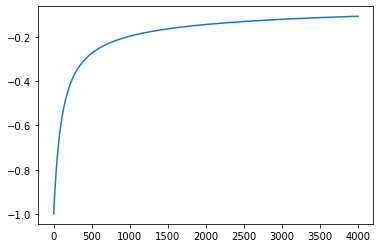

In [27]:
plt.plot(e)
plt.show()

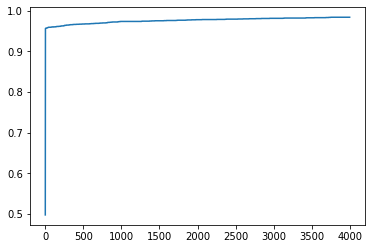

In [28]:
plt.plot(a)
plt.show()

In [29]:
print(a[-1])

0.984


In [30]:
print(final)

[-1.83364265  0.99905487 -2.01138625 -1.01074616]


In [37]:
dft=pd.read_csv('Logistic_X_Test.csv')
X1=dft['f1'].values
X2=dft['f2'].values
X3=dft['f3'].values
X4=np.ones(X1.shape,).T
X=np.vstack((X1,X2,X3,X4))
Y=[]
for i in range(X.shape[1]):
    ans=predict(X[:,i],final)
    Y.append(ans)
print(Y)

(4, 1000)
[1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,